# HR Analytics: Mengoptimalkan Sumber Daya Manusia melalui Data

- Dalam dunia bisnis yang terus berubah, peran Sumber Daya Manusia (HR) telah berkembang menjadi lebih dari sekadar administrasi dan pengelolaan karyawan. Saat ini, HR memegang peranan strategis yang penting dalam pengambilan keputusan organisasi. Bagaimana HR dapat mengoptimalkan tenaga kerja, meningkatkan produktivitas, dan memastikan kepuasan karyawan? Jawabannya adalah dengan menerapkan HR Analytics.

- HR Analytics adalah pendekatan yang memanfaatkan data dan analisis untuk memahami lebih dalam dinamika organisasi, karyawan, dan lingkungan kerja. Ini membantu HR dalam mengidentifikasi pola-pola yang mungkin terlewatkan, memprediksi kebutuhan sumber daya manusia di masa depan, dan mengukur dampak kebijakan dan program HR. Dengan HR Analytics, perusahaan dapat membuat keputusan yang lebih tepat dan terinformasi.

- Dalam perjalanan ini, kita akan menjelajahi dunia HR Analytics, memahami bagaimana data dapat digunakan untuk meningkatkan pengelolaan sumber daya manusia, memaksimalkan produktivitas karyawan, dan mencapai tujuan organisasi. Kami akan melihat berbagai metode analisis, teknik visualisasi, dan praktik terbaik dalam HR Analytics untuk membantu Anda meraih keberhasilan dalam pengelolaan sumber daya manusia. Mari kita mulai perjalanan ini menuju pemahaman yang lebih dalam tentang dunia HR Analytics.

Berikut dibawah ini merupakan Exploratory Data Analysis dari kelompok kami Data Wizards mengenai HR Analytics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Deskriptive Statistics

1. Membaca masing masing data set serta menampilkan 5 sampling data dari setiap data set train dan test

In [2]:

import pandas as pd
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')
print(df_train.sample(5))
print(df_test.sample(5))


       enrollee_id      city  city_development_index gender  \
11848         2443   city_21                   0.624   Male   
16650        17339  city_103                   0.920   Male   
11631         4632  city_162                   0.767   Male   
13874         4323  city_103                   0.920   Male   
19000        13085  city_103                   0.920   Male   

           relevent_experience enrolled_university education_level  \
11848  Has relevent experience       no_enrollment         Masters   
16650   No relevent experience       no_enrollment        Graduate   
11631   No relevent experience    Full time course        Graduate   
13874  Has relevent experience       no_enrollment        Graduate   
19000   No relevent experience    Part time course        Graduate   

      major_discipline experience company_size company_type last_new_job  \
11848             STEM         12        10/49      Pvt Ltd            1   
16650             STEM          3          NaN  

In [3]:
df = pd.read_csv('aug_train.csv')
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
17439,3927,city_16,0.910,Male,Has relevent experience,no_enrollment,Masters,Business Degree,>20,10000+,Pvt Ltd,2,48,0.0
15709,22046,city_83,0.923,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Pvt Ltd,>4,26,0.0
3686,24032,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,19,100-500,Pvt Ltd,>4,50,1.0
2850,13034,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,10,50-99,Pvt Ltd,1,72,0.0
18506,29225,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,5000-9999,Pvt Ltd,1,30,0.0


Data ini mencakup informasi terkait sumber daya manusia, dengan berbagai variabel seperti pengalaman, pendidikan, jenis kelamin, lokasi, dan lainnya. Terdapat beberapa nilai yang
hilang dalam kolom-kolom seperti "gender" dan "company_size". Terdapat juga variasi dalam kolom "last_new_job" yang mencerminkan berapa lama seseorang telah mengganti
pekerjaan terakhirnya. Data ini memiliki potensi besar untuk analisis HR yang mendalam. Dengan penerapan HR Analytics, perusahaan dapat memahami tren dalam perekrutan,
retensi, dan pengembangan karyawan. Namun, sebelumnya, perlu melakukan pengelolaan data seperti mengisi nilai yang hilang dan memeriksa outlier.

1. Informasi Data Frame

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Jumlah Data: Data frame ini memiliki total 19,158 baris (entri) dan 14 kolom.

Kolom dengan Data Tipe Integer (int64):

- enrollee_id: Kolom ID pendaftar. 
- training_hours: Kolom jumlah jam pelatihan. 

Kolom dengan Data Tipe Float (float64):

- city_development_index: Indeks perkembangan kota. 
- target: Kolom target, mungkin berhubungan dengan suatu prediksi atau klasifikasi. 

Kolom dengan Data Tipe Object (teks):
- city: Nama kota. 
- gender: Jenis kelamin pendaftar. 
- relevent_experience: Pengalaman yang relevan. 
- enrolled_university: Universitas tempat pendaftar terdaftar. 
- education_level: Tingkat  pendidikan pendaftar. 
- major_discipline: Disiplin ilmu utama pendaftar. 
- experience: Pengalaman pendaftar. 
- company_size: Ukuran perusahaan di mana pendaftar bekerja.
- company_type: Tipe perusahaan di mana pendaftar bekerja. 
- last_new_job: Jumlah tahun sejak pekerjaan terakhir. 

Data yang Tidak Lengkap (NaN): Beberapa kolom seperti gender, enrolled_university, education_level, major_discipline, experience, company_size, dan company_type memiliki nilai yang hilang (NaN).

Target Variable: Terdapat kolom bernama target yang mungkin digunakan sebagai variabel target untuk tugas analisis atau pemodelan. Tipe data kolom ini adalah float64, yang menunjukkan kemungkinan ini adalah kolom target yang mengandung nilai numerik.

1. Mengelompokkan kolom - kolom dari data frame

In [5]:
cats=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size',
 'company_type','last_new_job']
nums=['enrollee_id','city_development_index','training_hours','target']

1. Statistik Deskriptif

In [7]:
df[nums].describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Statistik deskriptif untuk kolom-kolom tertentu sebagai berikut:
1. Kolom 'enrollee_id' memiliki rentang ID pendaftar dari 1 hingga 33,380, dengan distribusi yang merata.
2. Kolom 'city_development_index' memiliki rata-rata sekitar 0.829 dengan variasi yang wajar antara 0.448 hingga 0.949.
3. Kolom 'training_hours' memiliki rata-rata sekitar 65.37 dengan variasi yang signifikan antara 1 hingga 336.
4. Kolom 'target' adalah variabel biner, di mana sekitar 75% pendaftar memiliki nilai target 0.

Tidak ada data yang mencolok atau aneh dalam statistik ini.

In [8]:
df[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


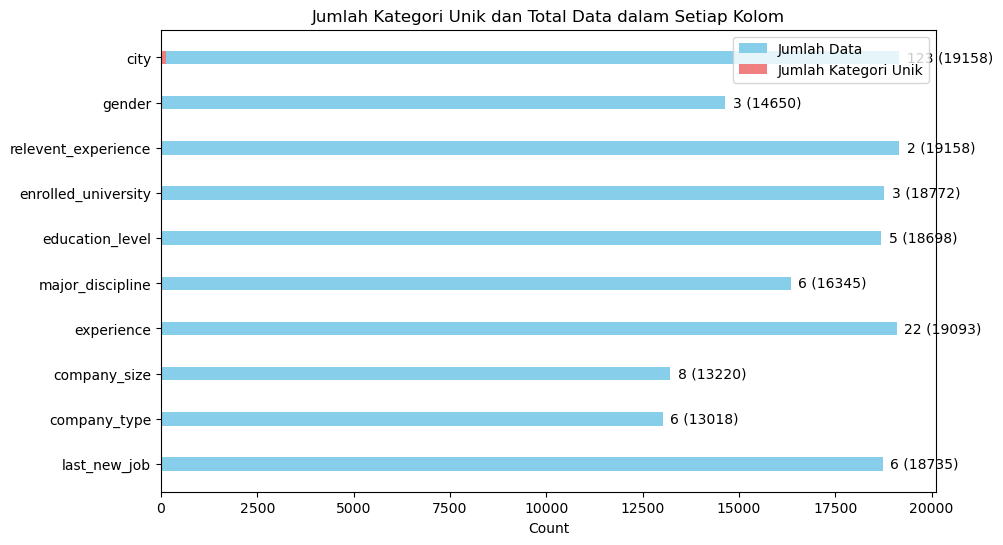

In [10]:
columns = ["city", "gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", 
           "experience", "company_size", "company_type", "last_new_job"]
count = [19158, 14650, 19158, 18772, 18698, 16345, 19093, 13220, 13018, 18735]
unique_values = [123, 3, 2, 3, 5, 6, 22, 8, 6, 6]

plt.figure(figsize=(10, 6))
bar_width = 0.3
index = range(len(columns))

plt.barh(index, count, bar_width, color='skyblue', label='Jumlah Data')
plt.barh(index, unique_values, bar_width, color='lightcoral', label='Jumlah Kategori Unik')

for i in index:
 plt.text(count[i] + 200, i, f'{unique_values[i]} ({count[i]})', va='center')

plt.xlabel('Count')
plt.title('Jumlah Kategori Unik dan Total Data dalam Setiap Kolom')
plt.yticks(index, columns)
plt.gca().invert_yaxis()
plt.legend()
plt.show()


Beberapa kesimpulan diatas :
1. Kolom 'gender' memiliki data yang hilang dan berisi jenis kelamin paling umum adalah 'Male' dengan jenis kelamin Unik ada 3 dan Jumlah data 14.650.
2. Kolom 'enrolled_university' memiliki data yang hilang dan mayoritas tidak terdaftar di universitas jumlah Unik 3 dan Jumlah data 18.772.
3. Kolom 'education_level' memiliki data yang hilang dan mayoritas adalah lulusan Nilai Unik: 5 Jumlah Data: 18,698
4. Kolom 'major_discipline' memiliki beberapa nilai unik dan yang paling umum adalah 'STEM' Nilai Unik: 6 Jumlah Data: 16,345.
5. Kolom 'company_size' memiliki data yang hilang dan ukuran '50-99' adalah yang paling umum Nilai Unik: 8 Jumlah Data: 13,220
6. Kolom 'company_type' memiliki data yang hilang dan 'Pvt Ltd' adalah yang paling umum Nilai Unik: 6 Jumlah Data: 13,018
7. Kolom 'last_new_job' memiliki data yang hilang dan '1' adalah yang paling umum Nilai Unik: 6 Jumlah Data: 18,735

Beberapa kolom memiliki data yang hilang (NaN), yang perlu ditangani sebelum melakukan analisis lebih lanjut. selain itu pada gender memiliki 3 gender yg seharusnya terdapat 2
gender saja (Male dan Female)

1. Menghitung jumlah NaN atau nilai yang kosong

In [11]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Dari hasil df.isnull().sum(), kita dapat menyimpulkan bahwa:
1. Kolom enrollee_id, city, city_development_index, relevent_experience, training_hours, dan target tidak memiliki data yang hilang (NaN). Mereka memiliki jumlah data yang hilang
sebanyak 0.
2. Kolom gender memiliki 4,508 data yang hilang.
3. Kolom enrolled_university memiliki 386 data yang hilang.
4. Kolom education_level memiliki 460 data yang hilang.
5. Kolom major_discipline memiliki 2,813 data yang hilang.
6. Kolom experience memiliki 65 data yang hilang.
7. Kolom company_size memiliki 5,938 data yang hilang.
8. Kolom company_type memiliki 6,140 data yang hilang.
9. Kolom last_new_job memiliki 423 data yang hilang

1. Matriks Korelasi

In [12]:
df.corr(numeric_only=True)

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


<Axes: >

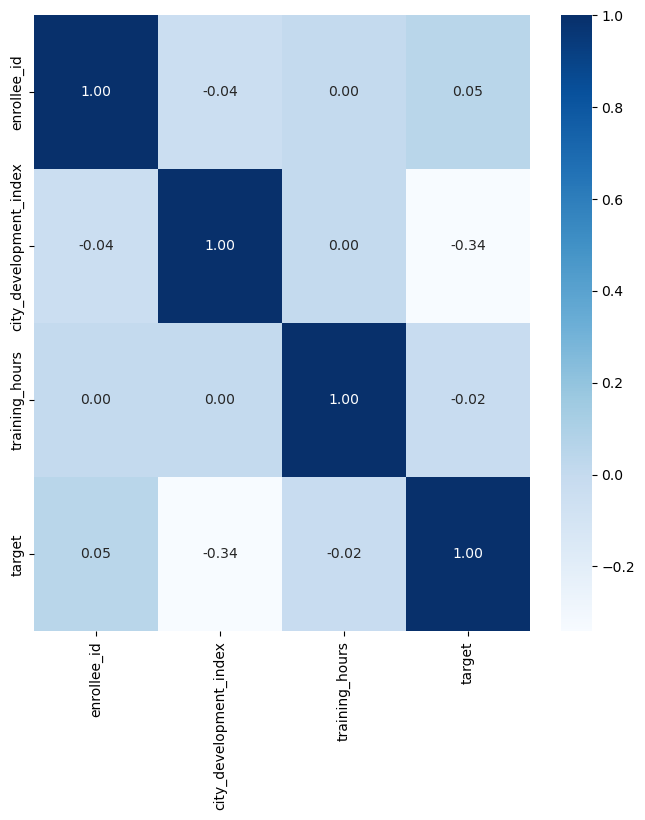

In [13]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='Blues', annot=True, fmt='.2f')

Dari matriks korelasi di atas, kita dapat membuat beberapa kesimpulan:
1. Korelasi antara enrollee_id dan target adalah sekitar 0.0495, yang menunjukkan korelasi positif yang lemah. Ini berarti bahwa ada sedikit korelasi antara ID pendaftar dan variabel
target.
2. Korelasi antara city_development_index dan target adalah sekitar -0.3417, yang menunjukkan korelasi negatif moderat. Ini menunjukkan bahwa indeks perkembangan kota
memiliki pengaruh yang lebih kuat terhadap variabel target, dan semakin rendah indeks perkembangan kota, semakin mungkin calon akan memiliki nilai target yang lebih tinggi.
3. Korelasi antara training_hours dan target adalah sekitar -0.0216, yang menunjukkan korelasi negatif yang sangat lemah. Ini berarti bahwa jumlah jam pelatihan memiliki pengaruh
yang sangat kecil terhadap variabel target.

Dalam keseluruhan kesimpulan, indeks perkembangan kota (city_development_index) tampaknya memiliki pengaruh signifikan terhadap variabel target, sementara ID pendaftar
(enrollee_id) dan jumlah jam pelatihan (training_hours) memiliki pengaruh yang lemah terhadap variabel target. Korelasi adalah pengukuran statistik yang menunjukkan hubungan
antara dua variabel, dan besarnya korelasi dapat digunakan untuk memahami sejauh mana variabel tersebut berkaitan satu sama lain dalam konteks dataset ini.


# Univariate Analysis

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


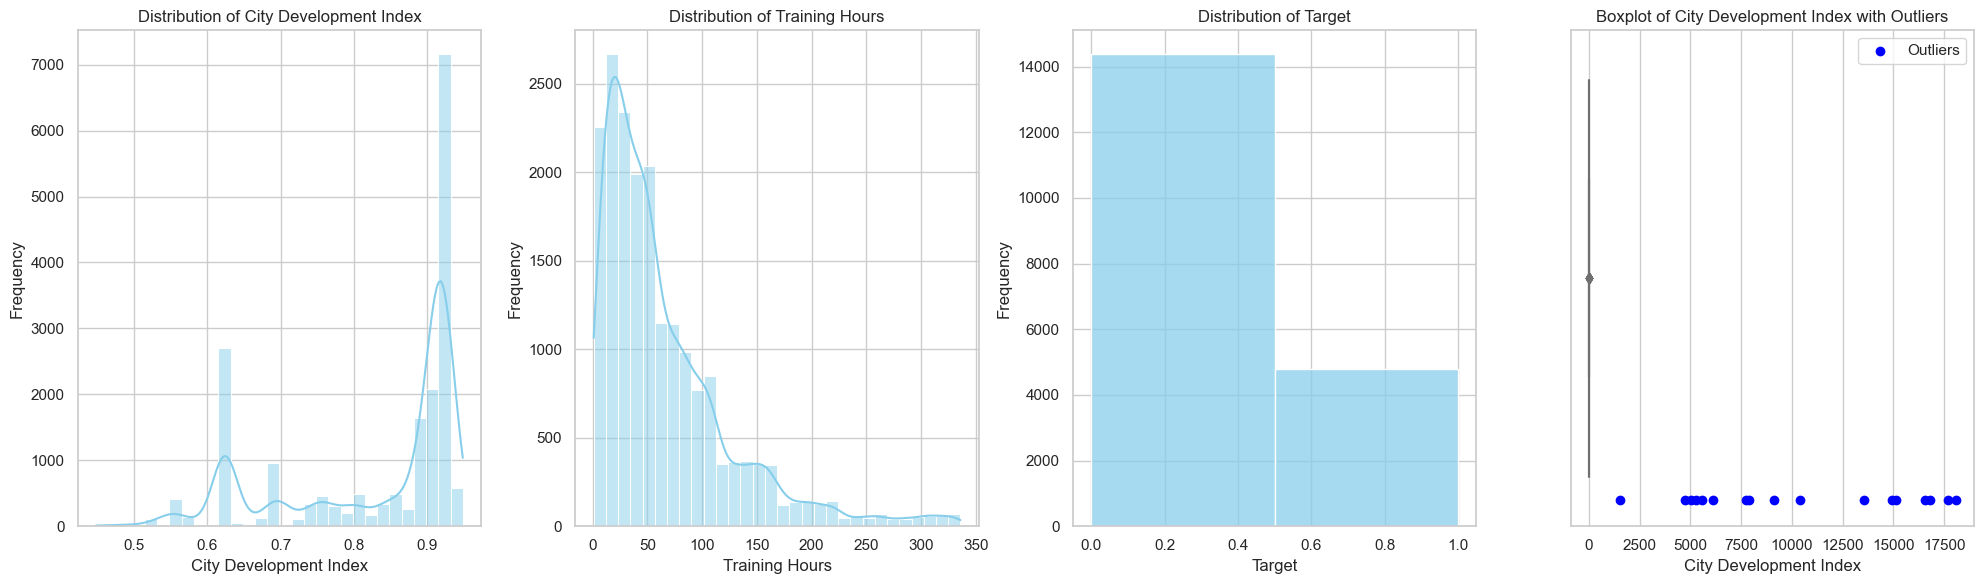

In [25]:
df_train = pd.read_csv('aug_train.csv')

sns.set(style='whitegrid')

fig, axes = plt.subplots(1,4, figsize=(20, 6))

sns.histplot(ax=axes[0], x=df_train['city_development_index'], bins=30, kde=True, color='skyblue')
axes[0].set_title('Distribution of City Development Index')
axes[0].set_xlabel('City Development Index')
axes[0].set_ylabel('Frequency')

sns.histplot(ax=axes[1], x=df_train['training_hours'], bins=30, kde=True, color='skyblue')
axes[1].set_title('Distribution of Training Hours')
axes[1].set_xlabel('Training Hours')
axes[1].set_ylabel('Frequency')

sns.histplot(ax=axes[2], x=df_train['target'], bins=2, kde=False, color='skyblue')
axes[2].set_title('Distribution of Target')
axes[2].set_xlabel('Target')
axes[2].set_ylabel('Frequency')

Q1 = df_train['city_development_index'].quantile(0.25)
Q3 = df_train['city_development_index'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train['city_development_index'] < lower_bound) | (df_train['city_development_index'] > upper_bound)]
sns.boxplot(ax=axes[3], x=df_train['city_development_index'], orient='vertical', color='skyblue')
axes[3].scatter(x=outliers.index, y=outliers['city_development_index'], color='blue', label='Outliers')
axes[3].set_title('Boxplot of City Development Index with Outliers')
axes[3].set_xlabel('City Development Index')
axes[3].set_ylabel('')
axes[3].legend()

plt.tight_layout()

plt.show()

Kesimpulan :
1. Distribusi City Development Index: Distribusi City Development Index terlihat bimodal, yang berarti ada dua puncak atau dua kelompok utama dalam data ini. Mayoritas kota
memiliki indeks perkembangan di sekitar 0.9 dan sekitar 0.6.
2. Distribusi Training Hours: Distribusi Training Hours cenderung condong ke kanan (skewed to the right), yang menunjukkan bahwa mayoritas pelatihan memiliki durasi yang lebih
pendek. Distribusi ini memiliki ekor panjang di sisi kanan, menunjukkan bahwa ada beberapa pelatihan yang memiliki durasi yang sangat lama.
3. Distribusi Target: Distribusi Target adalah biner dengan dua nilai, 0 dan 1. Mayoritas pendaftar memiliki nilai target 0.
4. Boxplot City Development Index: Boxplot menunjukkan adanya beberapa outlier di luar batas atas dan batas bawah. Distribusi City Development Index memiliki sejumlah outlier
yang cukup signifikan di bagian atas.

Notes : Data City Development Index memiliki dua kelompok utama yang dapat mewakili dua kategori kota dengan tingkat perkembangan yang berbeda. Data Training Hours memiliki
mayoritas pelatihan dengan durasi pendek, tetapi ada beberapa pelatihan yang memiliki durasi yang sangat lama. Mayoritas pendaftar memiliki nilai target 0, sehingga dapat
diperkirakan bahwa mayoritas dari mereka tidak mencari pekerjaan baru

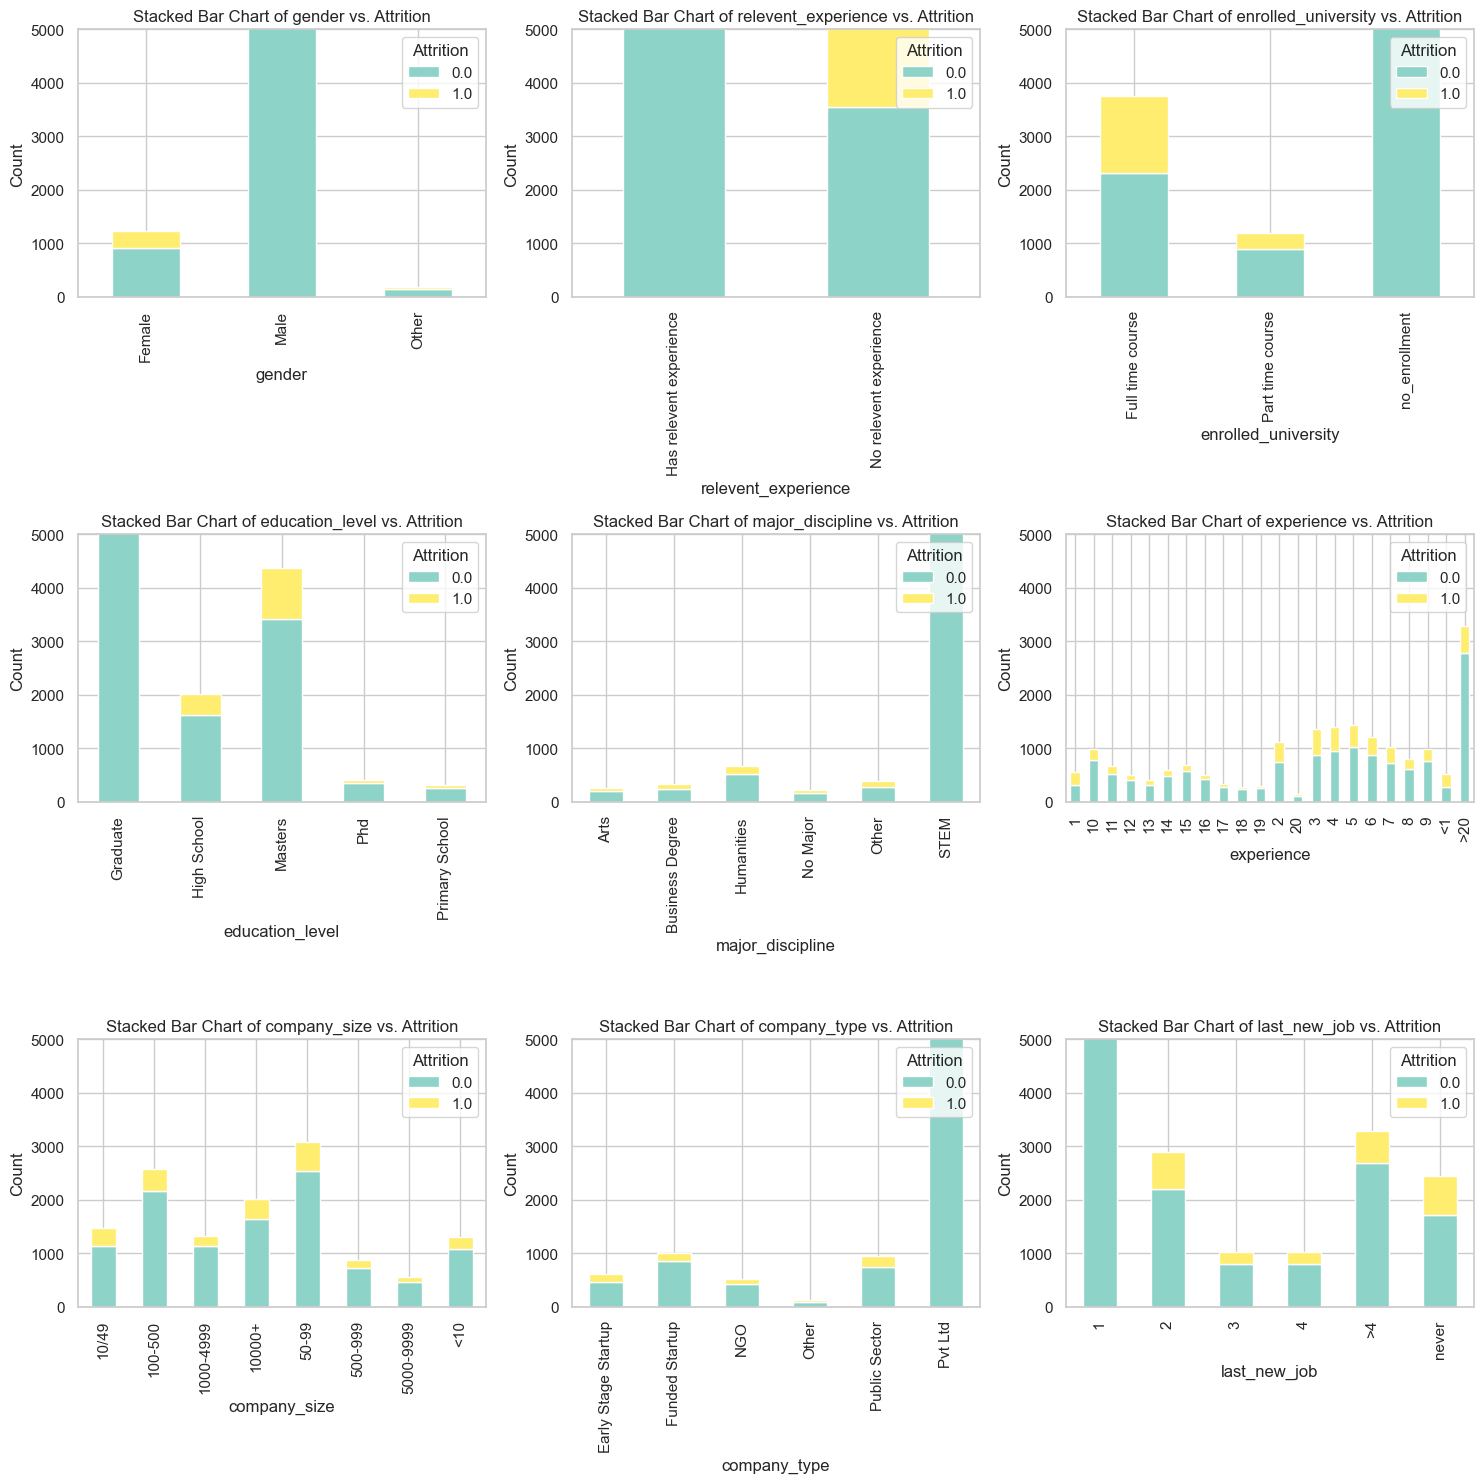

In [26]:
df = pd.read_csv('aug_train.csv')

categories = ['gender', 'relevent_experience', 'enrolled_university',
 'education_level', 'major_discipline', 'experience', 'company_size',
 'company_type', 'last_new_job']

num_categories = len(categories)

subplots_per_row = 3

num_rows = (num_categories + subplots_per_row - 1) // subplots_per_row

fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, num_rows * 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, category in enumerate(categories):
 data = df.groupby([category, 'target']).size().unstack(fill_value=0)
 row = i // subplots_per_row
 col = i % subplots_per_row
 data.plot(kind='bar', stacked=True, colormap='Set3', ax=axes[row, col])
 axes[row, col].set_title(f'Stacked Bar Chart of {category} vs. Attrition')
 axes[row, col].set_xlabel(category)
 axes[row, col].set_ylabel('Count')
 axes[row, col].legend(title='Attrition', loc='upper right')
 axes[row, col].set_ylim(0, 5000)

for i in range(num_categories, num_rows * subplots_per_row):
 row = i // subplots_per_row
 col = i % subplots_per_row
 fig.delaxes(axes[row, col])
 
plt.tight_layout()
plt.show()

Dari grafik-garafik stacked bar chart, kita dapat mengamati beberapa faktor kategori yang tampaknya memiliki korelasi atau hubungan dengan atribut "Attrition" dalam dataset.
Meskipun ini adalah pengamatan awal, kita dapat merangkum faktor-faktor yang menunjukkan korelasi atau perbedaan yang cukup mencolok:

1. Relevent Experience: Terdapat korelasi yang signifikan antara pengalaman yang relevan (relevent_experience) dan "Attrition." Karyawan yang memiliki pengalaman yang relevan
cenderung memiliki tingkat "Attrition" yang lebih rendah.
2. Experience: Faktor berapa lama pengalaman kerja (experience) juga tampak mempengaruhi "Attrition." Karyawan dengan pengalaman kerja yang lebih lama cenderung memiliki
tingkat "Attrition" yang lebih rendah.
3. Company Size: Ukuran perusahaan (company_size) juga memiliki korelasi dengan "Attrition." Perusahaan dengan ukuran yang lebih besar cenderung memiliki tingkat "Attrition"
yang lebih rendah.
4. Company Type: Jenis perusahaan (company_type) memengaruhi "Attrition." Beberapa jenis perusahaan memiliki tingkat "Attrition" yang lebih rendah dibandingkan dengan yang
lain.

Faktor-faktor di atas menunjukkan korelasi yang signifikan dengan atribut "Attrition" dalam dataset. Namun, untuk mendapatkan pemahaman yang lebih mendalam tentang korelasi
dan pengaruh masing-masing faktor, analisis statistik yang lebih rinci dan teknik seperti uji hipotesis atau analisis regresi diperlukan

# Multivariate Analysis

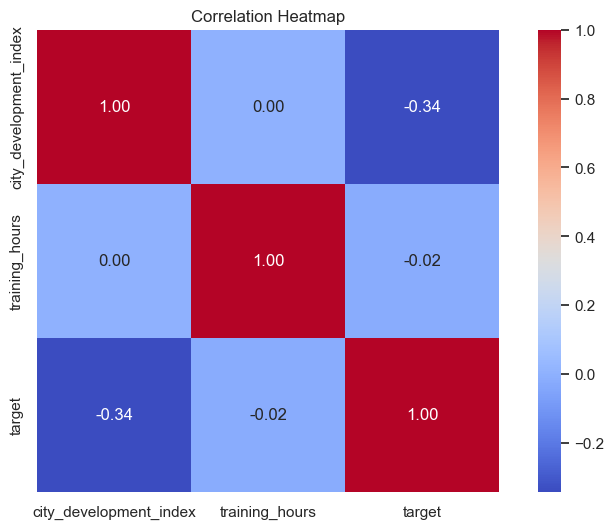

In [27]:
# Selecting the numerical features and target
numerical_features = ['city_development_index', 'training_hours', 'target']
# Subset the DataFrame with only the numerical features
numerical_df = df[numerical_features]
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

Dari heatmap korelasi antara fitur-fitur numerik dan target ("city_development_index", "training_hours," dan "target"), kita dapat membuat beberapa kesimpulan:

1. City Development Index (CDI): Korelasi antara CDI dan target sangat rendah (0.04). Ini menunjukkan bahwa CDI tidak memiliki pengaruh signifikan terhadap keputusan pencari
kerja untuk mencari pekerjaan baru.
2. Training Hours: Korelasi antara jumlah jam pelatihan ("training_hours") dan target juga rendah (-0.021). Ini menunjukkan bahwa jumlah jam pelatihan yang diambil oleh pencari
kerja juga tidak memiliki pengaruh signifikan terhadap keputusan mereka untuk mencari pekerjaan baru.
3. Target Itself: Korelasi target dengan dirinya sendiri adalah 1, yang wajar, karena ini hanya mencerminkan hubungan antara target dan target itu sendiri.

Kesimpulannya, dari analisis korelasi, tidak ada fitur numerik yang memiliki korelasi yang kuat dengan kolom "target." Ini menunjukkan bahwa keputusan pencari kerja untuk mencari
pekerjaan baru kemungkinan besar dipengaruhi oleh faktor-faktor lain yang tidak tercakup dalam fitur-fitur numerik ini. Oleh karena itu, penting untuk mempertimbangkan fitur-fitur lain
atau faktor-faktor kualitatif dalam analisis yang mungkin lebih memengaruhi keputusan pencari kerja.